# How the Social Progress Index compares to GDP per capita

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [411]:
#Load social progress index data
spi = pd.read_csv("2018-Results.csv")
spi.shape

(236, 69)

## Which countries have the highest standard of living?

In [412]:
spi = spi.sort_values('Social Progress Index',ascending=False)

spi.head(10)

,Country,Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,...,Corruption (0=high; 100=low),Acceptance of gays and lesbians (0=low; 100=high),Discrimination and violence against minorities (0=low; 10=high),Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities
101,Norway,NOR,90.26,96.62,93.19,80.97,99.00,99.54,99.24,88.69,...,85.0,88.901001,3.4,3.60607,2.98435,3.18915,0.97,15.42,9,30.0
65,Iceland,ISL,90.24,97.51,91.81,81.39,99.11,99.71,98.18,93.04,...,77.0,92.129898,1.1,2.58803,3.07599,3.36340,1.31,14.86,3,60.0
22,Switzerland,CHE,89.97,96.60,91.72,81.59,98.90,99.97,99.22,88.29,...,85.0,73.334999,3.6,3.04065,3.04000,3.57263,1.10,14.42,22,50.0
38,Denmark,DNK,89.96,96.17,92.06,81.64,98.72,99.91,98.85,87.23,...,88.0,80.350502,4.4,3.28380,3.55148,3.42399,0.95,15.13,13,40.0
47,Finland,FIN,89.77,95.66,92.49,81.16,99.22,99.87,98.23,85.34,...,85.0,80.416397,1.5,3.08577,3.24884,3.26332,0.95,15.05,18,30.0
69,Japan,JPN,89.74,97.78,94.66,76.78,98.21,99.11,98.21,95.58,...,73.0,28.907900,3.4,1.99409,3.13277,3.29081,1.37,15.51,111,30.0
100,Netherlands,NLD,89.34,96.41,91.65,79.97,98.75,99.47,98.80,88.62,...,82.0,90.378304,4.5,3.13459,3.41598,2.90859,0.98,14.69,26,30.0
81,Luxembourg,LUX,89.27,94.97,91.41,81.43,98.97,99.40,98.40,83.13,...,82.0,77.685303,2.8,2.69461,3.17716,3.78530,1.05,14.08,2,80.0
36,Germany,DEU,89.21,95.35,90.71,81.57,98.88,99.82,95.54,87.15,...,81.0,71.760300,4.9,3.42478,3.02198,3.45784,0.76,14.24,99,50.0
103,New Zealand,NZL,89.12,96.81,90.62,79.91,98.11,100.00,97.41,91.74,...,89.0,76.211403,3.3,3.09920,2.62412,2.78660,1.19,15.04,15,50.0


## Which countries have the highest GDP per person?

In [413]:
#Load GDP data

gdp = pd.read_csv("gdp-world-bank.csv")
gdp = gdp.sort_values('2017',ascending=False)
gdp.head(10)

,Country Name,Country Code,2017
142,Luxembourg,LUX,104103.03670
144,"Macao SAR, China",MAC,80892.82133
35,Switzerland,CHE,80189.69686
175,Norway,NOR,75504.56626
112,Iceland,ISL,70056.87339
109,Ireland,IRL,69330.69015
198,Qatar,QAT,63505.80525
249,United States,USA,59531.66196
168,North America,NAC,58070.06614
206,Singapore,SGP,57714.29663


In [414]:
#Merge datasets
gdp.rename(columns={'2017':'GDP per capita 2017'},inplace=True)
spi.rename(columns={'Code':'Country Code'}, inplace=True)

df = pd.merge(gdp, spi, on='Country Code')
df = df.dropna(subset=['GDP per capita 2017','Social Progress Index'])

## How closely do GDP per capita and the social progress index correlate?

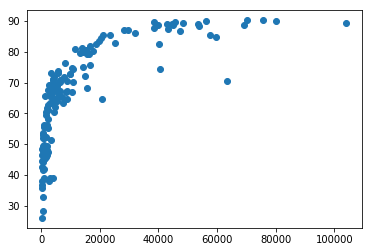

In [415]:
#Plot GDP per capita vs. social progress index
plt.scatter(df['GDP per capita 2017'],df['Social Progress Index'])
plt.show()

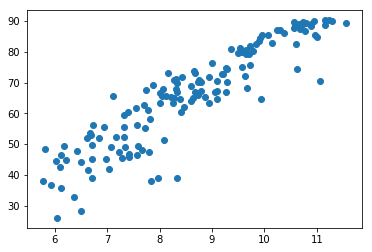

In [416]:
#Since there's clearly a logarithmic relationship between GDP per capita and the social progress index, 
#let's create a log measure of GDP per capita:

df['logGDPpc'] = np.log(df['GDP per capita 2017'])
plt.scatter(df['logGDPpc'],df['Social Progress Index'])
plt.show()

In [417]:
#Calculate correlation between GDP and social progress index
print np.corrcoef(df['GDP per capita 2017'],df['Social Progress Index'])
print np.corrcoef(df['logGDPpc'],df['Social Progress Index'])

[[ 1.          0.71796657]
 [ 0.71796657  1.        ]]
[[ 1.          0.91258131]
 [ 0.91258131  1.        ]]


## So GDP per capita and human welfare seem to have a log-linear relationship. 

#### Let's fit a model to predict welfare based on GDP per capita, and see which countries are least-well described by it.

In [418]:
# Create and fit linear regression model
regr = linear_model.LinearRegression()
gdp_values = df['logGDPpc'].values.reshape(-1, 1)
regr.fit(gdp_values,df['Social Progress Index'])

# Get predictions and add them to the dataframe
predictions = regr.predict(gdp_values)
df['Predictions'] = predictions

# Store the difference between the actual SPI score and the predicted one
df['Residual'] = df['Social Progress Index'] - df['Predictions']

## Which countries have higher welfare scores than GDP per capita would predict?

In [419]:
df = df.sort_values('Residual',ascending=False)
df.head(30)

,Country Name,Country Code,GDP per capita 2017,Country,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,...,Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities,logGDPpc,Predictions,Residual
154,Kyrgyz Republic,KGZ,1219.824048,Kyrgyzstan,65.79,79.79,68.93,48.66,91.42,91.94,...,2.217270,2.347760,2.197940,0.63,13.79,0,0.0,7.106462,51.220253,14.569747
118,Tunisia,TUN,3490.828293,Tunisia,73.07,85.50,74.50,59.20,94.27,92.53,...,2.229570,2.646840,3.051370,0.52,9.10,2,20.0,8.157894,61.623861,11.446139
128,Ukraine,UKR,2639.824326,Ukraine,69.30,81.48,69.38,57.04,93.74,90.59,...,2.408580,0.345424,2.136540,1.50,14.69,8,10.0,7.878468,58.859018,10.440982
134,Moldova,MDA,2289.877719,Moldova,67.69,81.86,69.71,51.49,93.36,80.88,...,1.502960,1.764940,2.877150,0.56,13.80,0,0.0,7.736254,57.451853,10.238147
184,Malawi,MWI,338.483642,Malawi,48.35,52.91,50.21,41.94,61.86,54.87,...,1.859100,1.605270,2.214090,0.01,4.98,0,0.0,5.824476,38.535386,9.814614
160,Nepal,NPL,835.079847,Nepal,56.07,67.88,55.73,44.62,77.78,61.28,...,2.849150,2.432650,2.636540,0.11,3.60,0,0.0,6.727527,47.470809,8.599191
112,Armenia,ARM,3936.798320,Armenia,70.87,87.17,76.67,48.76,92.89,97.16,...,1.209330,1.194260,3.242840,0.88,13.10,0,0.0,8.278123,62.813488,8.056512
109,Georgia,GEO,4078.254879,Georgia,71.14,81.78,76.19,55.46,93.63,90.89,...,2.227800,2.462160,2.444340,NaN,14.57,1,20.0,8.313424,63.162784,7.977216
101,Albania,ALB,4537.862492,Albania,71.77,84.59,80.77,49.94,91.66,92.97,...,2.129180,1.548110,2.737060,0.07,12.26,0,0.0,8.420211,64.219409,7.550591
59,Costa Rica,CRI,11630.668400,Costa Rica,80.99,88.41,86.06,68.50,95.49,98.91,...,3.045950,1.953090,3.091170,0.77,10.92,2,20.0,9.361401,73.532195,7.457805


## Which countries have lower welfare scores than GDP per capita would predict?

In [420]:
df = df.sort_values('Residual',ascending=True)
df.head(30)

,Country Name,Country Code,GDP per capita 2017,Country,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,...,Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities,logGDPpc,Predictions,Residual
105,Angola,AGO,4170.312280,Angola,39.10,45.68,40.86,30.76,68.48,32.30,...,2.266320,0.657543,0.873608,NaN,5.31,0,0.0,8.335746,63.383651,-24.283651
127,Sudan,SDN,2898.549346,Sudan,38.85,49.86,43.52,23.17,67.59,46.13,...,1.100270,0.414326,0.352820,0.14,5.67,0,0.0,7.971966,59.784152,-20.934152
129,Papua New Guinea,PNG,2555.853162,Papua New Guinea,38.11,38.43,34.10,41.81,61.99,35.42,...,0.777637,1.462430,2.523340,0.05,6.04,0,0.0,7.846141,58.539159,-20.429159
6,Qatar,QAT,63505.805250,Qatar,70.64,88.48,80.06,43.38,95.70,98.48,...,1.098630,0.925473,0.114685,0.50,10.82,2,50.0,11.058887,90.328307,-19.688307
171,Chad,TCD,669.886426,Chad,28.20,30.76,32.45,21.39,45.63,16.28,...,1.160160,0.705601,0.395146,NaN,1.63,0,0.0,6.507108,45.289828,-17.089828
181,Central African Republic,CAF,418.411287,Central African Republic,26.01,26.76,22.81,28.47,22.10,37.03,...,2.077890,2.277540,1.998050,0.06,4.27,0,0.0,6.036465,40.632954,-14.622954
38,Saudi Arabia,SAU,20760.906010,Saudi Arabia,64.75,85.30,74.82,34.13,95.18,99.51,...,0.315868,0.854925,0.758201,0.46,9.61,14,20.0,9.940827,79.265443,-14.515443
21,United Arab Emirates,ARE,40698.849340,United Arab Emirates,74.34,88.65,79.16,55.20,95.05,98.17,...,1.420740,2.574440,1.374710,0.43,13.18,8,20.0,10.613955,85.925844,-11.585844
174,Afghanistan,AFG,585.850064,Afghanistan,32.96,41.50,29.45,27.95,58.67,47.13,...,0.976909,1.087670,2.266150,0.28,0.98,0,0.0,6.373064,43.963500,-11.003500
131,Lao PDR,LAO,2457.376266,Laos,47.58,61.87,51.27,29.60,71.64,63.60,...,1.797110,1.583900,0.722753,0.22,6.11,0,0.0,7.806850,58.150378,-10.570378


## Data sources

#### World bank data is available here: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 
#### SPI Index is available here: https://www.socialprogress.org/?tab=4

#### Warning, I formatted the data prior to starting the notebook which of course is a no-no for reproducible data science. But in this case I was playing around and short on time; apologies.